In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
file_path = 'BankChurners.csv'
data = pd.read_csv(file_path)
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


/var/folders/83/zntmggs17yv3s8kdngvk1q2r0000gn/T/ipykernel_76033/1433748489.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette="viridis")


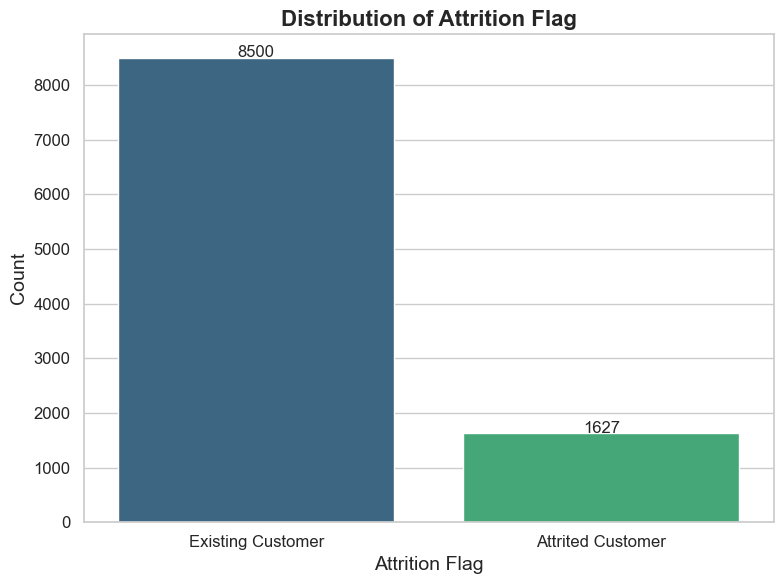

In [3]:
# Set the aesthetic style for the plot
sns.set(style="whitegrid")

# Count the occurrences of each category in 'Attrition_Flag'
attrition_counts = data['Attrition_Flag'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette="viridis")

# Add count labels on top of the bars
for i, count in enumerate(attrition_counts.values):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12)

# Set plot title and labels
plt.title('Distribution of Attrition Flag', fontsize=16, weight='bold')
plt.xlabel('Attrition Flag', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

## Observation
The bar chart shows the distribution of the **"Attrition Flag"** for customers. It is evident that there is a significant imbalance in the data:
- The **"Existing Customer"** category has a much higher count compared to the **"Attrited Customer"** category.

This imbalance in the dataset can lead to **biased model performance**, where the model may become more accurate at predicting the majority class while neglecting the minority class. To address this imbalance, the following technique can be applied during the preprocessing step:


**Synthetic Data Generation**:
   - Using methods like **SMOTE (Synthetic Minority Oversampling Technique)** to generate synthetic samples for the minority class.


This method can help ensure that the model learns from both classes effectively and achieves a **balanced performance**.


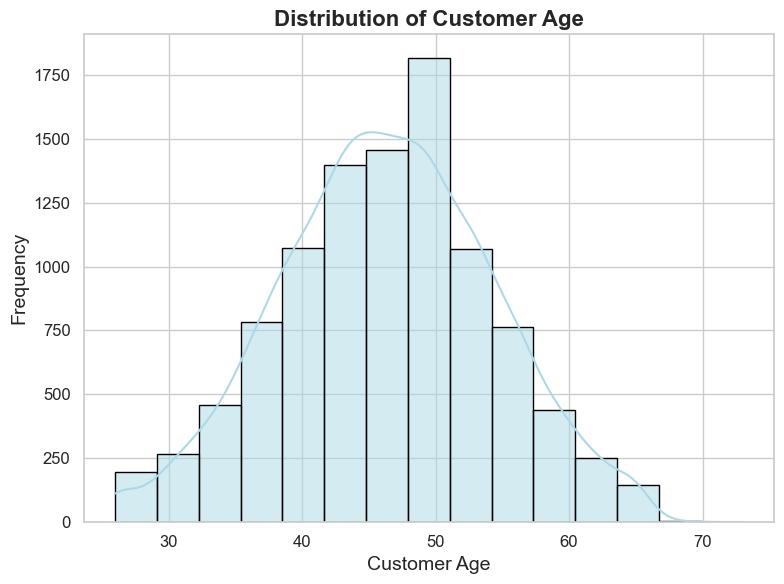

In [4]:
# Create a histogram for the distribution of Customer Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Customer_Age'], bins=15, kde=True, color="lightblue", edgecolor="black")

# Set plot title and labels
plt.title('Distribution of Customer Age', fontsize=16, weight='bold')
plt.xlabel('Customer Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


## Observation: Customer Age Distribution -Histogram

1. **Age Range**:
   - The majority of customers fall within the age range of approximately **40 to 60 years**, indicating that **middle-aged individuals** make up the largest portion of the customer base.

2. **Distribution Shape**:
   - The distribution appears **slightly right-skewed**, with fewer customers in the **younger (below 30)** and **older (above 65)** age groups.

3. **Peak Age Group**:
   - The most frequent age group is around **50 years**, suggesting a **concentration of customers** in this range.


/var/folders/83/zntmggs17yv3s8kdngvk1q2r0000gn/T/ipykernel_76033/2235918832.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=education_counts.index, y=education_counts.values, palette="muted")


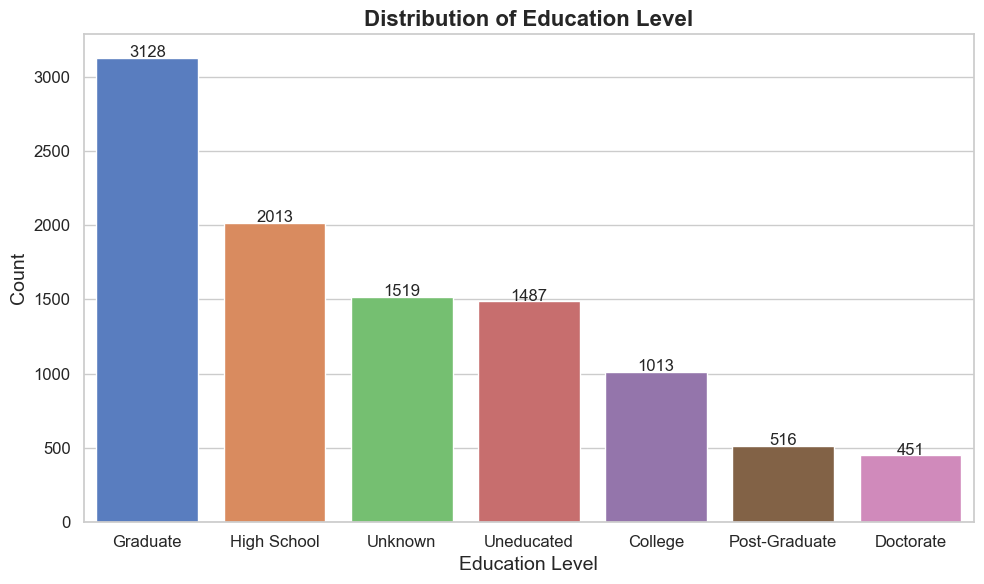

In [5]:
# Count the occurrences of each category in 'Education_Level'
education_counts = data['Education_Level'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=education_counts.index, y=education_counts.values, palette="muted")

# Add count labels on top of the bars
for i, count in enumerate(education_counts.values):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12)

# Set plot title and labels
plt.title('Distribution of Education Level', fontsize=16, weight='bold')
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


## Observation: Diversity in Education Levels - Bar Graph

1. **Diversity in Education Levels**:
   - The bar graph indicates a **diverse distribution** of education levels among customers.
   - Categories such as **"Graduate," "High School,"** and **"Uneducated"** have notable representation.

2. **Dominant Categories**:
   - The **"Graduate"** category has the **highest count**, followed by **"High School."**
   - This suggests that the majority of customers are either **high school graduates** or have pursued **higher education**.

3. **Placeholder (Unknown) Values**:
   - The **"Unknown"** category has a significant number of entries, which could represent **missing or incomplete data**.
   - These values can negatively impact the **analysis** and **model performance** if not addressed. During **data preprocessing**, these values should be handled appropriately.

/var/folders/83/zntmggs17yv3s8kdngvk1q2r0000gn/T/ipykernel_76033/661027263.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=marital_status_counts.index, y=marital_status_counts.values, palette="pastel")


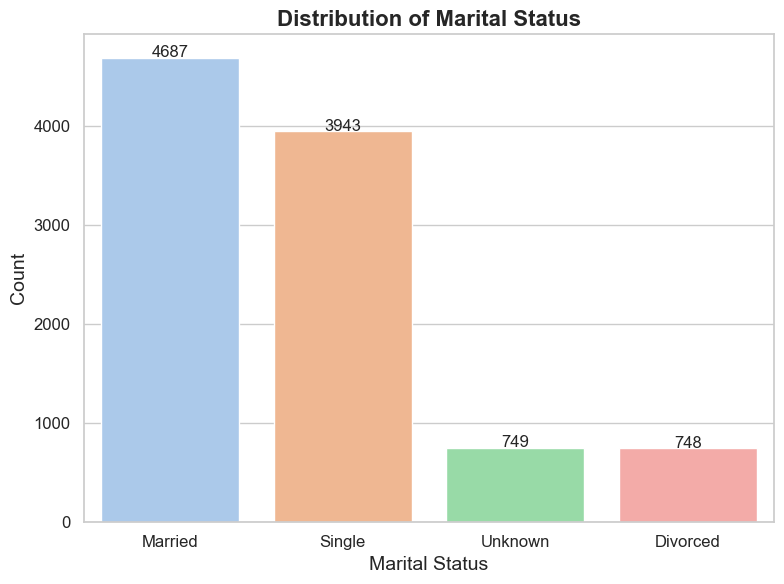

In [6]:
# Count the occurrences of each category in 'Marital_Status'
marital_status_counts = data['Marital_Status'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=marital_status_counts.index, y=marital_status_counts.values, palette="pastel")

# Add count labels on top of the bars
for i, count in enumerate(marital_status_counts.values):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12)

# Set plot title and labels
plt.title('Distribution of Marital Status', fontsize=16, weight='bold')
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


## Observations: Marital Status Distribution


**Dominant Marital Status**:
   - The **"Married"** category has the **highest count**, indicating that a majority of the customers are married.

   - The **"Single"** category has a **notable count**, indicating a significant portion of unmarried individuals among the customer base.
   - The **"Unknown"** category shows a **moderate count**, which could represent missing or unrecorded data.

**Placeholder (Unknown) Values**:
   - The presence of **"Unknown"** values suggests **incomplete or ambiguous data**.
   - These placeholder entries can affect the **analysis** and should be addressed during **data preprocessing**.

/var/folders/83/zntmggs17yv3s8kdngvk1q2r0000gn/T/ipykernel_76033/422604793.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=income_category_counts.index, y=income_category_counts.values, palette="coolwarm")


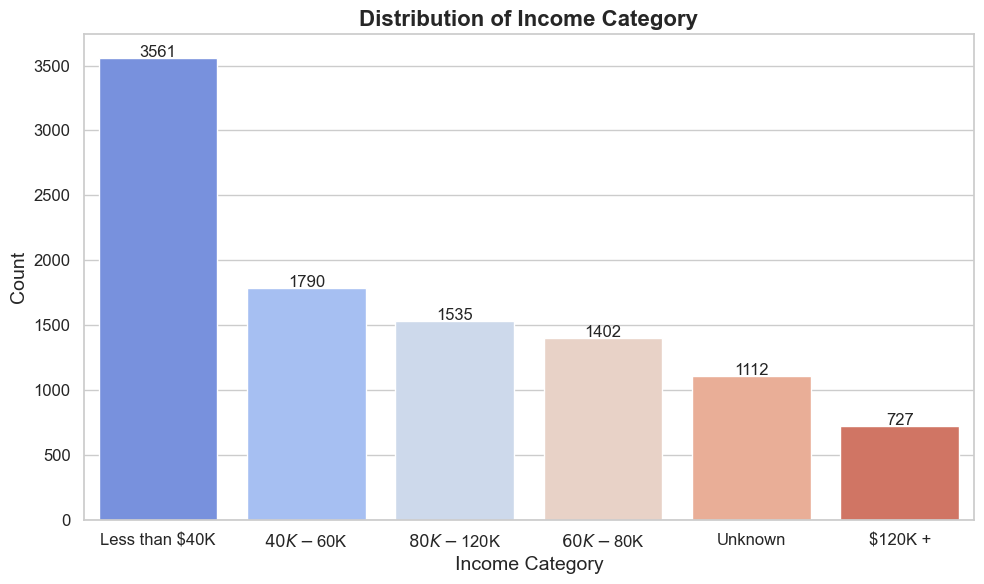

In [7]:
# Count the occurrences of each category in 'Income_Category'
income_category_counts = data['Income_Category'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=income_category_counts.index, y=income_category_counts.values, palette="coolwarm")

# Add count labels on top of the bars
for i, count in enumerate(income_category_counts.values):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12)

# Set plot title and labels
plt.title('Distribution of Income Category', fontsize=16, weight='bold')
plt.xlabel('Income Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


## Observations: Income Distribution


1. **Dominant Income Categories**:
   - The **"Less than $40K"** category has the **highest count**, indicating that a significant portion of the customer base falls within a **lower-income group**.
   - The **"$40K - $60K"** and **"$60K - $80K"** categories are also well-represented, highlighting a strong presence of **middle-income customers**.

2. **Lower Representation**:
   - Higher-income categories, such as **"$120K+"** and **"$80K - $120K"**, have relatively **fewer customers**, indicating a smaller proportion of high-income individuals in the customer base.

3. **Placeholder (Unknown) Values**:
   - The **"Unknown"** category represents a **notable portion** of the data, suggesting that income information for these customers is either **missing** or **not recorded**.


## Research Question
### Does a significant difference exist in the **average credit utilization ratio** between **male** and **female** credit card holders?

In [8]:
# Perform statistical analysis to investigate the difference in average credit utilization ratio between male and female customers

# Separate the data based on gender
male_utilization = data[data['Gender'] == 'M']['Avg_Utilization_Ratio']
female_utilization = data[data['Gender'] == 'F']['Avg_Utilization_Ratio']

# Perform t-test for independent samples
t_stat, p_value = ttest_ind(male_utilization, female_utilization, nan_policy='omit')

# Calculate mean and standard deviation for each group
male_mean = male_utilization.mean()
female_mean = female_utilization.mean()
male_std = male_utilization.std()
female_std = female_utilization.std()

# Results summary
{
    "Male Mean Utilization": male_mean,
    "Male Std Dev": male_std,
    "Female Mean Utilization": female_mean,
    "Female Std Dev": female_std,
    "T-Statistic": t_stat,
    "P-Value": p_value
}


{'Male Mean Utilization': np.float64(0.199547913608723),
 'Male Std Dev': np.float64(0.23244982829063326),
 'Female Mean Utilization': np.float64(0.34195651362448676),
 'Female Std Dev': np.float64(0.2932998552507342),
 'T-Statistic': np.float64(-26.85380811729272),
 'P-Value': np.float64(1.6653873266473568e-153)}

# Statistical Analysis: Average Credit Utilization Ratio Between Male and Female Credit Card Holders

## Summary Statistics

### Male Credit Holders:
- **Mean Utilization Ratio**: 0.1995
- **Standard Deviation**: 0.2324

### Female Credit Holders:
- **Mean Utilization Ratio**: 0.3420
- **Standard Deviation**: 0.2933


## Hypothesis Testing

### Hypotheses:
- **Null Hypothesis (H₀)**: There is no significant difference in the average credit utilization ratio between male and female credit card holders.
- **Alternative Hypothesis (H₁)**: There is a significant difference in the average credit utilization ratio between male and female credit card holders.

### Test Results:
- **T-Statistic**: -26.85
- **P-Value**: 1.67e-153


## Interpretation
- The **extremely low p-value** (< 0.05) provides **strong evidence to reject the null hypothesis**.
- This indicates a **statistically significant difference** in the average credit utilization ratio between male and female credit card holders.


## Insights
1. **Higher Utilization Among Females**:
   - Females have a **notably higher average credit utilization ratio** (0.3420) compared to males (0.1995).
   


/var/folders/83/zntmggs17yv3s8kdngvk1q2r0000gn/T/ipykernel_76033/1962644538.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Gender', y='Avg_Utilization_Ratio', palette="coolwarm")


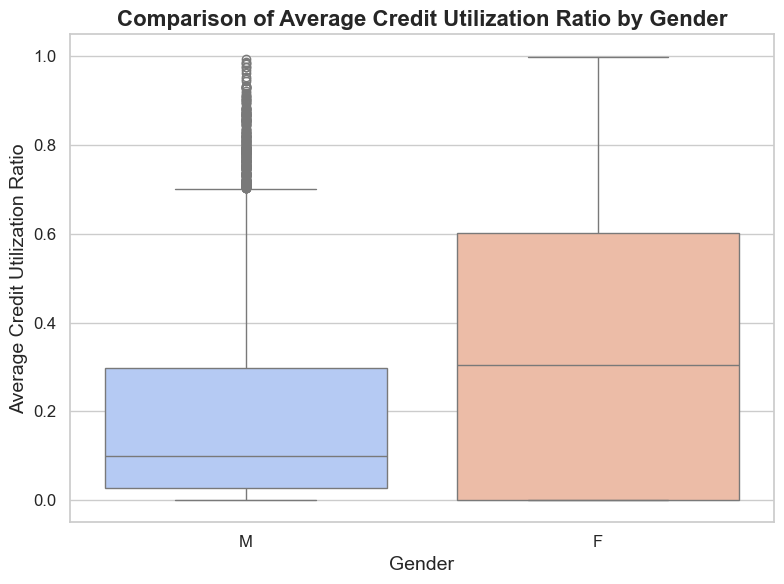

In [9]:
# Create a boxplot to visualize the distribution of credit utilization ratio by gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Gender', y='Avg_Utilization_Ratio', palette="coolwarm")

# Set plot title and labels
plt.title('Comparison of Average Credit Utilization Ratio by Gender', fontsize=16, weight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Credit Utilization Ratio', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


# Visual Analysis: Boxplot of Average Credit Utilization Ratio by Gender

## Key Observations

1. **Median Utilization Ratio**:
   - The **median utilization ratio** for females is **clearly higher** than that for males, visually confirming the difference in central tendency.

2. **Range and Variability**:
   - Females exhibit a **wider range of credit utilization**:
     - This is reflected in the **longer interquartile range (IQR)** and whiskers.
   - Males show a comparatively **narrower distribution** of utilization ratios.

3. **Gender Differences**:
   - The boxplot highlights **visible differences** in the **central tendency** (median) and **variability** (IQR) between male and female credit card holders.
   - These findings are consistent with the results of the statistical analysis.


## Conclusion
The boxplot visually supports the conclusion that **females have a higher average credit utilization ratio** and greater variability compared to males. This reinforces the insights derived from the summary statistics and hypothesis testing.
